In [1]:
from stock_scraper import get_stock_prices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
PAIRS = [("CLGX", "JKHY"), ("DST", "FTNT"), ("MDLZ", "KHC"), ("AEL", "LNC"), ("TEX", "AGCO"), ("HIG", "BRK-B"),
         ("ASGN", "MAN"), ("BDX", "WST"), ("SHAK", "SONC"), ("CIEN", "JNPR"), ("ST", "LFUS"), ("AVY", "HON"),
         ("HES", "WLL"), ("XON", "NKTR"), ("CLR", "CXO")]

START_DATE = "2015-01-01"
START_TRAINING_DATE = "2016-01-01"
START_TESTING_DATE = "2017-01-01"
END_TESTING_DATE = "2018-01-01"

In [3]:
all_stocks = [stock for pair in PAIRS for stock in pair]
OHLC_prices = get_stock_prices(all_stocks, START_DATE, END_TESTING_DATE)
prices = OHLC_prices['Adj Close']

Succeeded in 4.61s after 1 attempts


In [4]:
prices

,CLGX,JKHY,DST,FTNT,MDLZ,KHC,AEL,LNC,TEX,AGCO,...,ST,LFUS,AVY,HON,HES,WLL,XON,NKTR,CLR,CXO
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,31.430000,59.597340,44.370811,30.790001,34.737900,NaN,28.068661,53.563732,27.505613,43.657787,...,52.259998,92.730721,48.301491,93.163513,69.606140,132.759995,26.110001,15.170000,38.790001,101.010002
2015-01-05,30.780001,59.041698,44.112854,30.520000,34.218575,NaN,27.757652,51.912609,25.726690,41.650425,...,51.139999,90.820045,47.704605,91.388176,66.235680,118.959999,26.080000,14.970000,34.650002,96.110001
2015-01-06,30.750000,58.830940,43.601601,29.950001,33.982521,NaN,27.155071,50.252151,24.895239,41.456467,...,50.520000,89.413712,48.180256,91.174393,65.212334,117.599998,26.350000,14.670000,33.590000,94.180000
2015-01-07,31.580000,59.348259,44.356750,30.379999,35.049488,NaN,27.203667,50.951786,24.643867,41.427380,...,50.259998,91.431084,48.655895,91.834335,65.062119,117.480003,27.360001,15.190000,33.580002,91.989998
2015-01-08,32.549999,60.574501,45.102512,31.209999,35.493275,NaN,27.883999,52.122120,24.808226,42.309841,...,51.200001,93.409637,50.101494,93.507423,67.014915,123.800003,28.010000,15.700000,35.470001,96.400002
2015-01-09,32.759998,59.913486,45.266685,31.070000,35.143913,NaN,27.174507,50.895611,23.928432,41.863766,...,50.250000,92.546448,49.448635,91.955170,66.770821,125.120003,30.080000,15.390000,36.540001,99.419998
2015-01-12,32.930000,60.354168,45.247917,30.840000,34.813427,NaN,26.484457,50.446205,23.067974,41.921947,...,49.490002,92.517349,49.793728,91.509003,64.245331,109.400002,29.500000,15.680000,34.970001,95.080002
2015-01-13,32.599998,60.842743,44.905518,30.900000,34.586823,NaN,26.513613,49.912525,22.545900,41.941345,...,50.599998,93.370842,49.765743,92.159645,63.550575,110.320000,28.370001,15.380000,35.810001,96.980003
2015-01-14,33.910000,60.526608,44.882080,30.920000,34.511280,NaN,25.940187,48.592384,22.323536,42.164383,...,49.470001,93.661812,49.924286,91.732094,65.005798,112.959999,37.299999,15.610000,37.980000,100.660004


In [5]:
def compute_hedge(stock1, stock2, start, end):
        slice_ = np.log(prices[[stock1,stock2]].dropna()[start:end])
        slice_ = slice_.dropna()
        if len(slice_) < 100:
            self.beta = None ###Not enough data
            return 1
        y = slice_[stock1].reshape(-1, 1)
        X = slice_[stock2].reshape(-1, 1)

        reg = LinearRegression(fit_intercept=False)
        reg.fit(y, X)
        hedge = np.squeeze(reg.coef_)
        print(hedge)
        hedge = np.append(hedge,reg.intercept_)
        return hedge


def compute_residual(stock1, stock2, start, end):
    hedge = compute_hedge(stock1, stock2, start, end)
    intercept = 0
    if len(hedge) == 2:
        intercept = hedge[1]
        hedge = hedge[0]
        
    slice_ = np.log(prices[[stock1,stock2]].dropna())
    y = slice_[stock1]
    x = slice_[stock2]
    residuals = y - x * hedge - intercept
    return pd.Series(residuals)

In [6]:
RESIDUALS = dict()
for pair in PAIRS:
    s1, s2 = pair
    RESIDUALS[pair] = compute_residual(s1, s2, START_TRAINING_DATE, START_TESTING_DATE)

1.2193369382565444
0.8624258776666418
1.1721364518318513
1.3480705836868538
1.2411087937281562
1.3280925603496112
1.1895872622707608
0.8424481136592926
0.9255626770144787
1.0593123657821355
1.325700660061127
1.102830906700634
0.90341669391689
0.7959513983657033
1.2989760934985752


/Users/maksimivanov/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/Users/maksimivanov/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [7]:
pd.DataFrame(RESIDUALS)

,AEL,ASGN,AVY,BDX,CIEN,CLGX,CLR,DST,HES,HIG,MDLZ,SHAK,ST,TEX,XON
,LNC,MAN,HON,WST,JNPR,JKHY,CXO,FTNT,WLL,BRK-B,KHC,SONC,LFUS,AGCO,NKTR
2015-01-02,-2.031843,-1.462609,-1.123166,1.577912,-0.267958,-1.536412,-2.336897,0.836885,-0.173539,-2.974765,NaN,NaN,-2.048795,-1.372510,1.097872
2015-01-05,-2.000776,-1.450989,-1.114382,1.595752,-0.256096,-1.545888,-2.385169,0.838650,-0.124017,-2.976586,NaN,NaN,-2.042858,-1.380952,1.107286
2015-01-06,-1.978901,-1.462973,-1.101877,1.608369,-0.265546,-1.542503,-2.389888,0.843252,-0.129200,-2.991652,NaN,NaN,-2.034367,-1.408012,1.133698
2015-01-07,-1.995752,-1.457405,-1.100008,1.617970,-0.290572,-1.526544,-2.359623,0.848129,-0.130584,-3.000577,NaN,NaN,-2.069105,-1.417289,1.143587
2015-01-08,-2.001665,-1.476170,-1.090641,1.619633,-0.294467,-1.521228,-2.365693,0.841556,-0.148349,-3.011831,NaN,NaN,-2.078957,-1.436802,1.140781
2015-01-09,-1.995337,-1.481454,-1.085296,1.617446,-0.307738,-1.501418,-2.376042,0.849067,-0.161580,-3.004354,NaN,NaN,-2.085378,-1.459755,1.227954
2015-01-12,-2.009102,-1.454501,-1.072978,1.608558,-0.277729,-1.505178,-2.361980,0.855060,-0.078842,-3.002875,NaN,NaN,-2.100201,-1.498101,1.193625
2015-01-13,-1.993664,-1.429382,-1.081353,1.585971,-0.288372,-1.525081,-2.363945,0.845788,-0.097281,-3.003528,NaN,NaN,-2.090194,-1.521567,1.169943
2015-01-14,-1.979394,-1.407335,-1.073044,1.593286,-0.265669,-1.479331,-2.353491,0.844708,-0.096005,-3.011732,NaN,NaN,-2.116904,-1.538061,1.431789


In [8]:
def mean_reversion_sequence(series, ma_lookback, sd_lookback, sd_threshold=0.75):
    """
    Convert a series into a sequence of zeros and ones, where ones correspond to data points where a crossover has 
    _just_ occurred. Define a crossover as anytime the price goes from outside to inside SD_THRESHOLD SDs away from 
    the mean.
    """
    ma_series = series.rolling(window=ma_lookback, center=False).mean()
    sd_series = series.rolling(window=sd_lookback, center=False).std()
    z_series = (series - ma_series) / sd_series

    crossunders = [0] + [1 if z_series[i] < sd_threshold and z_series[i-1] >= sd_threshold else 0 
               for i in range(1, len(z_series))]
    crossovers = [0] + [1 if z_series[i] > -sd_threshold and z_series[i-1] <= -sd_threshold else 0 
               for i in range(1, len(z_series))]
    result = np.array(crossunders) + np.array(crossovers)
    result = pd.Series(index = series.index, data=result)
    return result

In [9]:
def zonify(series, ma_lookback, sd_lookback, zone_width = 0.75):
    """
    Label each point into its respective bucket, determined by how many SDs away from the MA_LOOKBACK simple moving
    average. Every ZONE_WIDTH SDs is one bucket.
    """
    ma_series = series.rolling(window=ma_lookback, center=False).mean()
    sd_series = series.rolling(window=sd_lookback, center=False).std()
    z_scores = (series - ma_series) / sd_series
    continuous_buckets = z_scores / zone_width
    
    # np.ceil rounds up to inf, so round up instead the absolute values and then multiply by the sign of the numbers
    buckets = np.ceil(np.abs(continuous_buckets)) * (continuous_buckets / np.abs(continuous_buckets))

    return buckets

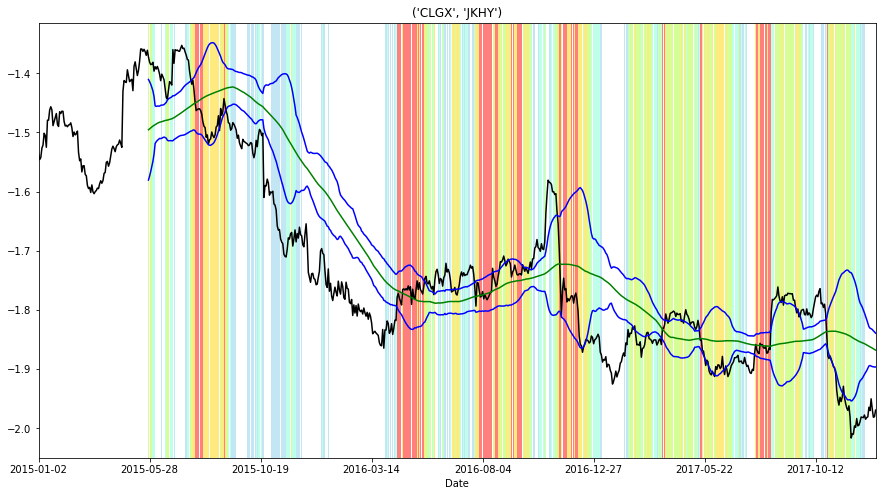

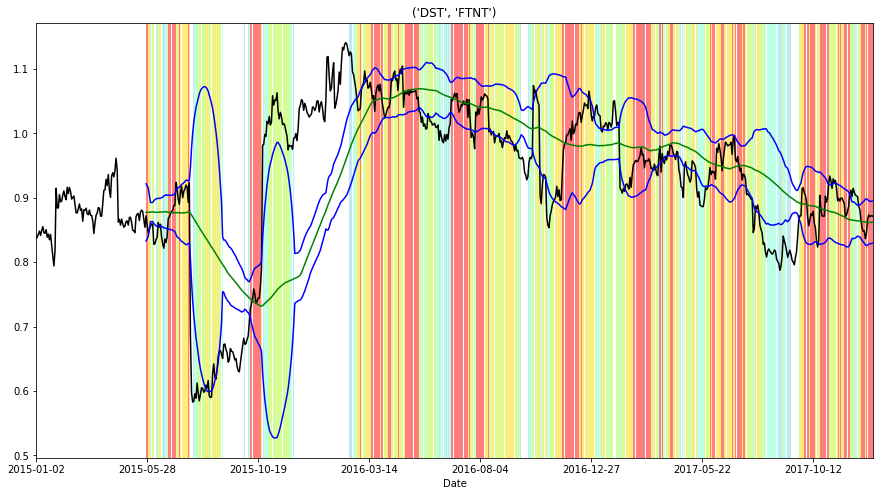

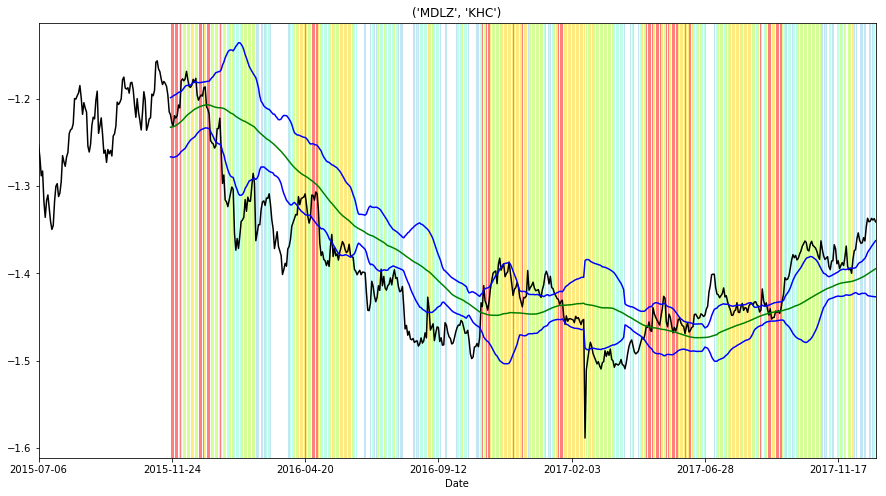

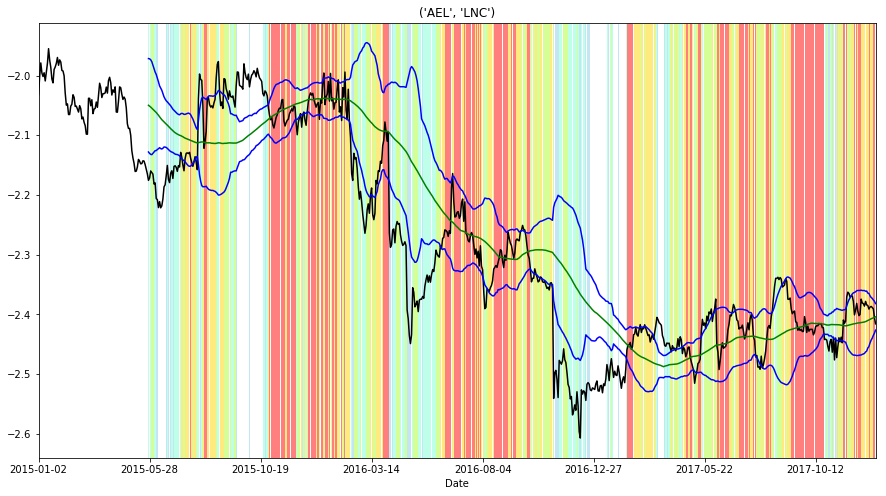

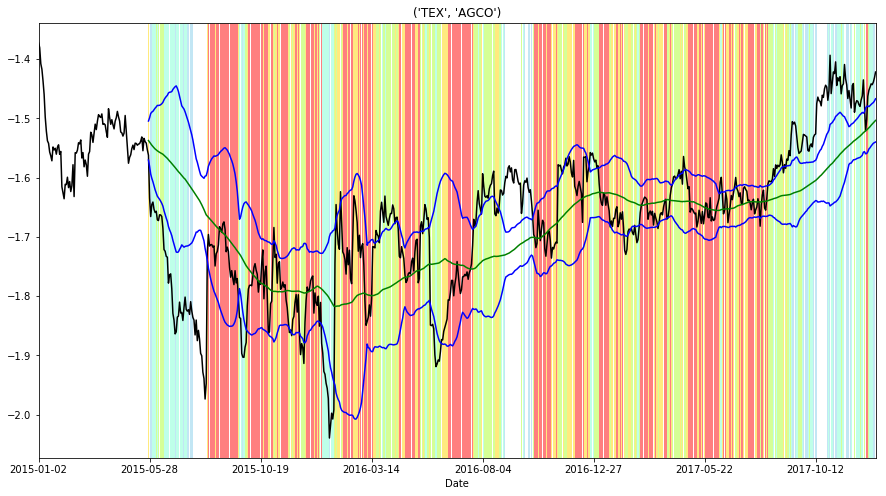

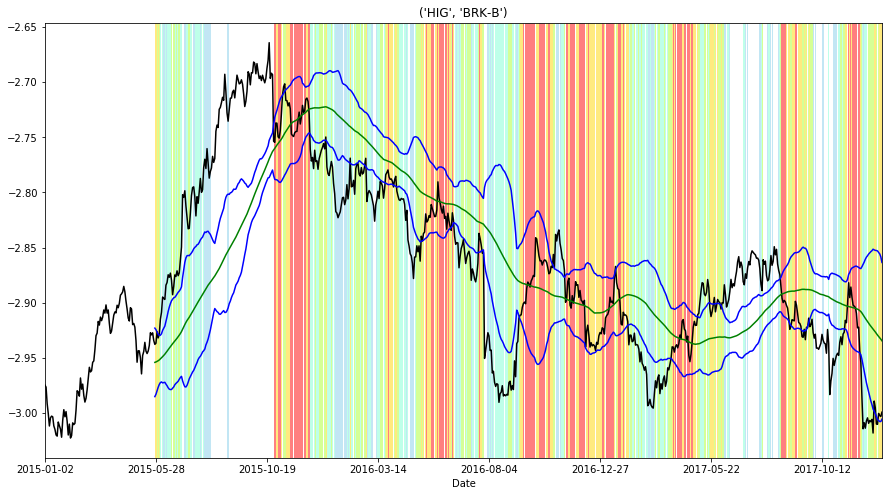

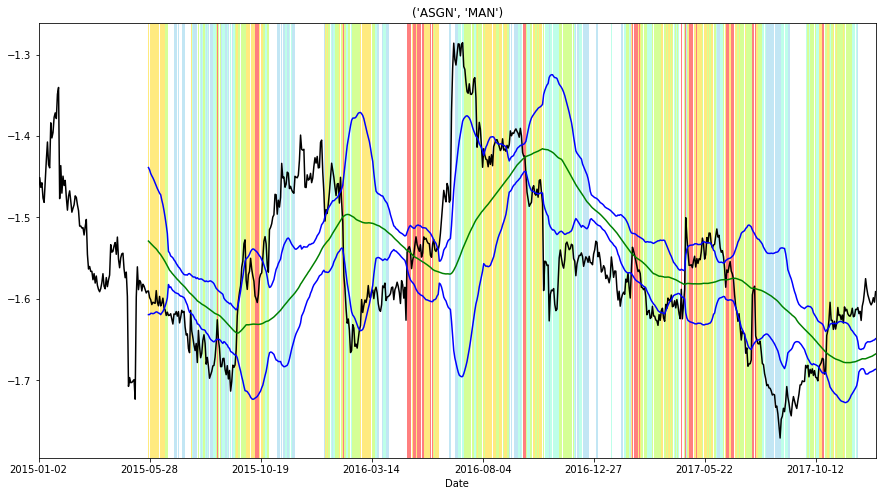

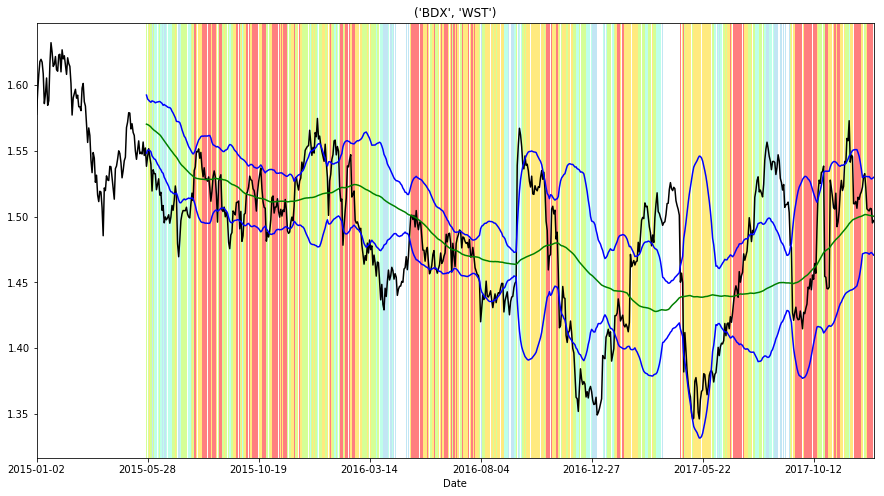

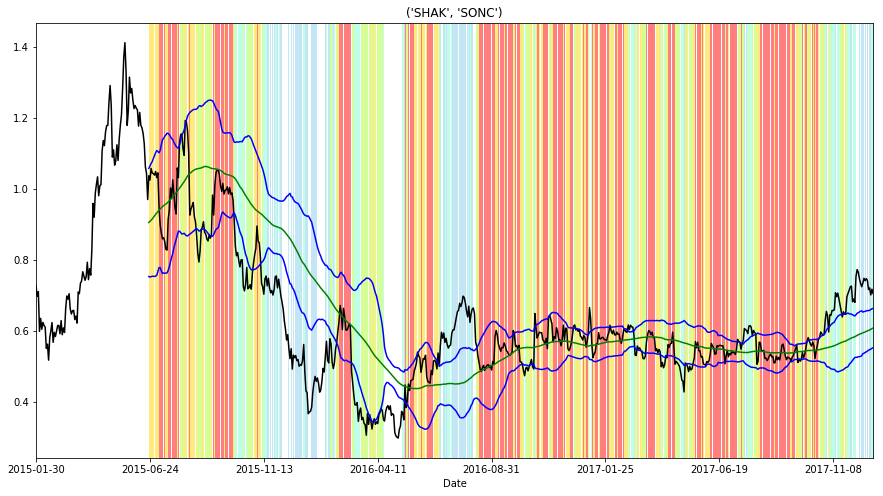

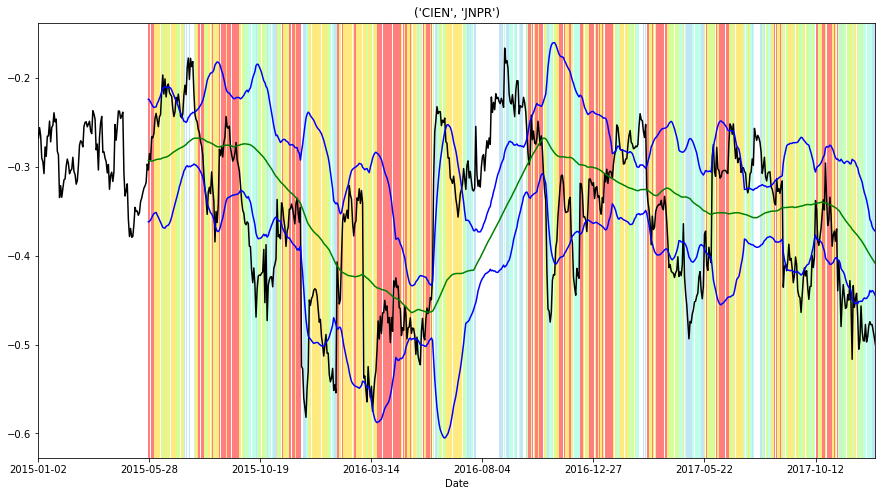

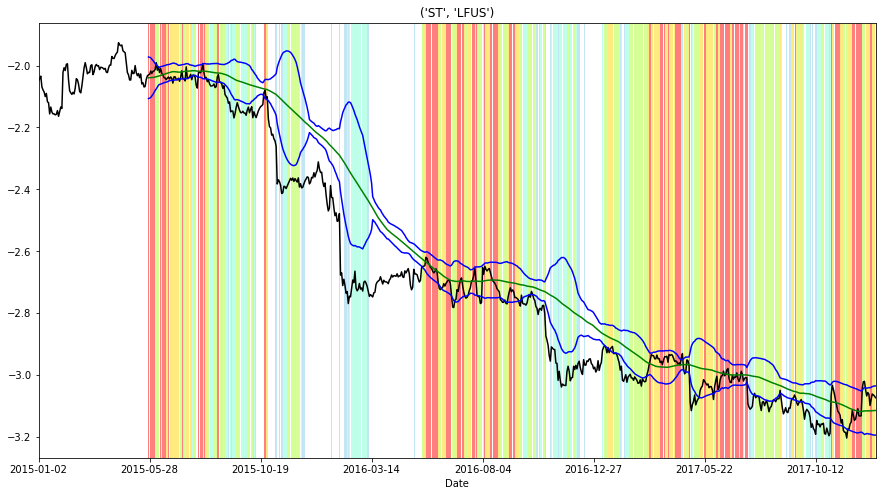

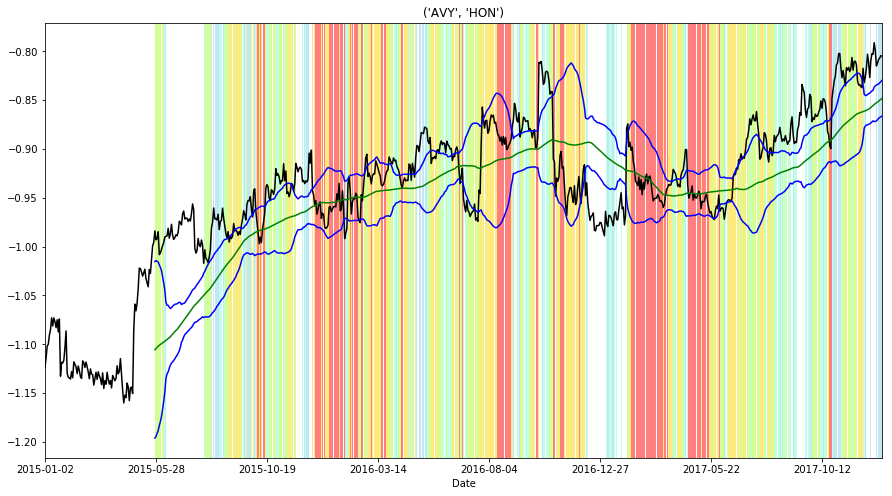

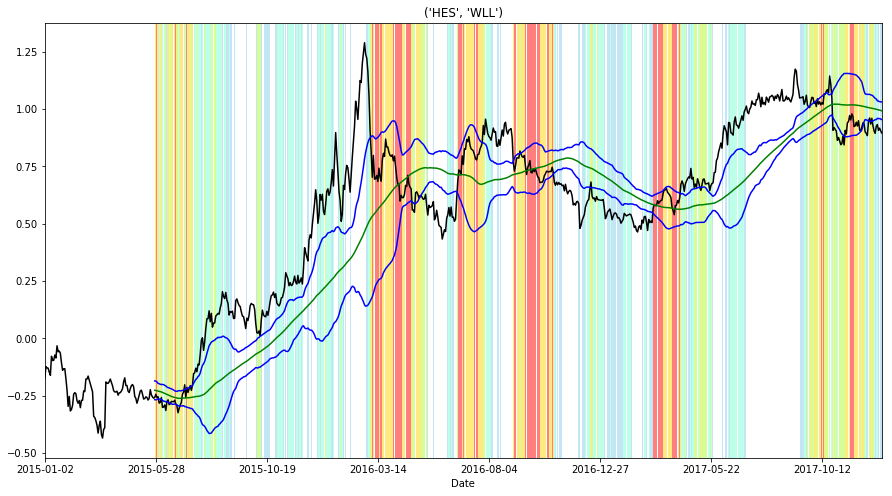

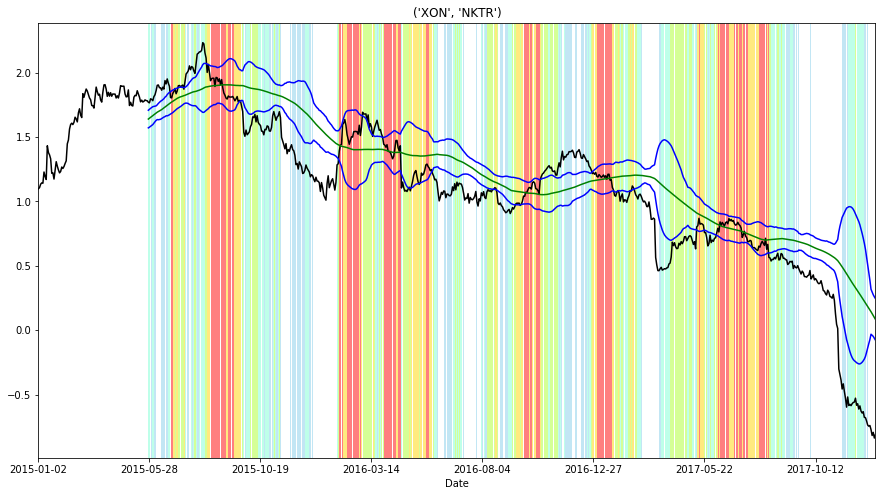

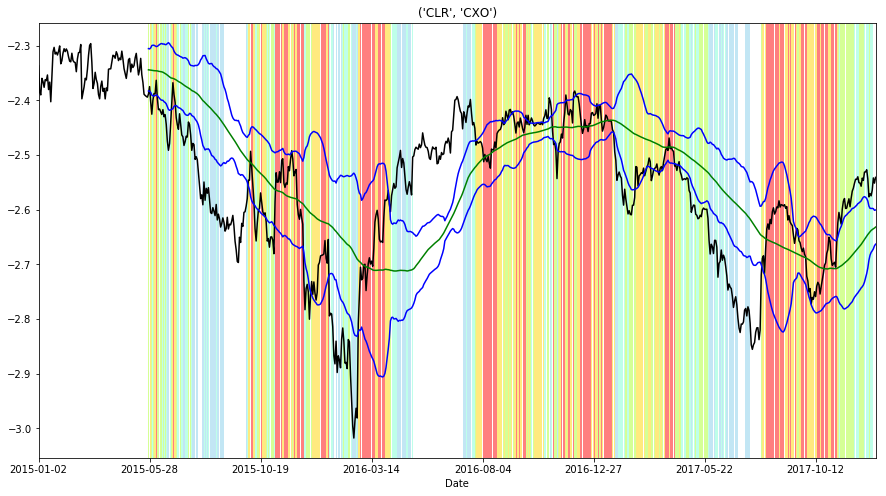

In [10]:
MA_LOOKBACK = 100
SD_LOOKBACK = 30

for i in range(len(PAIRS)):
    plt.figure(i)
    pair = PAIRS[i]
    zonified = zonify(RESIDUALS[pair], ma_lookback=MA_LOOKBACK, sd_lookback=SD_LOOKBACK)
    residual = RESIDUALS[pair]
    residual.plot(color='black')
    plt.title(pair)
    ma = residual.rolling(window=MA_LOOKBACK, center=False).mean()
    sd = residual.rolling(window=SD_LOOKBACK, center=False).std()
    ma.plot(color='g',figsize=(15,8))
    (ma+1.5*sd).plot(color='b')
    (ma-1.5*sd).plot(color='b')


    colors = {1.0:'red', 2.0:'gold', 3.0: 'greenyellow', 4.0: 'aquamarine', 5.0: 'skyblue'}
    for i in range(len(zonified.index)):
        abs_zone = np.abs(zonified.iloc[i])
        if abs_zone in colors:
            color = colors[abs_zone]
            plt.axvspan(i, i, alpha=0.5, color=color)

In [11]:
ZONED_RESIDUALS = dict()
CROSSOVER_SEQUENCES = dict()
for pair in PAIRS:
    zonified = zonify(RESIDUALS[pair], ma_lookback=MA_LOOKBACK, sd_lookback=SD_LOOKBACK, zone_width=0.75)
    crossover_sequence = mean_reversion_sequence(RESIDUALS[pair], MA_LOOKBACK, SD_LOOKBACK, sd_threshold=0)
    ZONED_RESIDUALS[pair] = zonified
    CROSSOVER_SEQUENCES[pair] = crossover_sequence

In [12]:
residualpd.DataFrame(RESIDUALS)

,AEL,ASGN,AVY,BDX,CIEN,CLGX,CLR,DST,HES,HIG,MDLZ,SHAK,ST,TEX,XON
,LNC,MAN,HON,WST,JNPR,JKHY,CXO,FTNT,WLL,BRK-B,KHC,SONC,LFUS,AGCO,NKTR
2015-01-02,-2.031843,-1.462609,-1.123166,1.577912,-0.267958,-1.536412,-2.336897,0.836885,-0.173539,-2.974765,NaN,NaN,-2.048795,-1.372510,1.097872
2015-01-05,-2.000776,-1.450989,-1.114382,1.595752,-0.256096,-1.545888,-2.385169,0.838650,-0.124017,-2.976586,NaN,NaN,-2.042858,-1.380952,1.107286
2015-01-06,-1.978901,-1.462973,-1.101877,1.608369,-0.265546,-1.542503,-2.389888,0.843252,-0.129200,-2.991652,NaN,NaN,-2.034367,-1.408012,1.133698
2015-01-07,-1.995752,-1.457405,-1.100008,1.617970,-0.290572,-1.526544,-2.359623,0.848129,-0.130584,-3.000577,NaN,NaN,-2.069105,-1.417289,1.143587
2015-01-08,-2.001665,-1.476170,-1.090641,1.619633,-0.294467,-1.521228,-2.365693,0.841556,-0.148349,-3.011831,NaN,NaN,-2.078957,-1.436802,1.140781
2015-01-09,-1.995337,-1.481454,-1.085296,1.617446,-0.307738,-1.501418,-2.376042,0.849067,-0.161580,-3.004354,NaN,NaN,-2.085378,-1.459755,1.227954
2015-01-12,-2.009102,-1.454501,-1.072978,1.608558,-0.277729,-1.505178,-2.361980,0.855060,-0.078842,-3.002875,NaN,NaN,-2.100201,-1.498101,1.193625
2015-01-13,-1.993664,-1.429382,-1.081353,1.585971,-0.288372,-1.525081,-2.363945,0.845788,-0.097281,-3.003528,NaN,NaN,-2.090194,-1.521567,1.169943
2015-01-14,-1.979394,-1.407335,-1.073044,1.593286,-0.265669,-1.479331,-2.353491,0.844708,-0.096005,-3.011732,NaN,NaN,-2.116904,-1.538061,1.431789


In [13]:
zoned_df = pd.DataFrame(ZONED_RESIDUALS)

In [14]:
crossover_df = pd.DataFrame(CROSSOVER_SEQUENCES)

In [18]:
lb = max(MA_LOOKBACK, SD_LOOKBACK)
p = PAIRS[0]
p_zones = zoned_df[pair][lb:]

p_crossovers = crossover_df[pair][lb:]

In [19]:
p_zones

2015-05-28    3.0
2015-05-29    3.0
2015-06-01    4.0
2015-06-02    4.0
2015-06-03    4.0
2015-06-04    7.0
2015-06-05    7.0
2015-06-08    7.0
2015-06-09    7.0
2015-06-10    6.0
2015-06-11    5.0
2015-06-12    6.0
2015-06-15    6.0
2015-06-16    6.0
2015-06-17    4.0
2015-06-18    3.0
2015-06-19    3.0
2015-06-22    3.0
2015-06-23    4.0
2015-06-24    4.0
2015-06-25    4.0
2015-06-26    7.0
2015-06-29    5.0
2015-06-30    7.0
2015-07-01    7.0
2015-07-02    6.0
2015-07-06    6.0
2015-07-07    6.0
2015-07-08    6.0
2015-07-09    6.0
             ... 
2017-11-16   -2.0
2017-11-17   -3.0
2017-11-20   -3.0
2017-11-21   -3.0
2017-11-22   -3.0
2017-11-24   -3.0
2017-11-27   -3.0
2017-11-28   -4.0
2017-11-29   -4.0
2017-11-30   -4.0
2017-12-01   -3.0
2017-12-04   -4.0
2017-12-05   -4.0
2017-12-06   -4.0
2017-12-07   -4.0
2017-12-08   -5.0
2017-12-11   -4.0
2017-12-12   -5.0
2017-12-13   -5.0
2017-12-14   -5.0
2017-12-15   -6.0
2017-12-18   -6.0
2017-12-19   -7.0
2017-12-20   -7.0
2017-12-21